# Wrapper-Funktion (V)

Sie schreiben eine neue Funktion, die die `plot()`-Funktionalität von Matplotlib *kapselt* und anschließend das Logo ergänzt. In Zukunft könnten dann alle Personen diese Funktion anstelle der direkten Matplotlib-Nutzung verwenden.

Die Funktion `plot_line_with_logo`:
- ruft intern Matplotlib-Funktionalität auf (hier: `ax.plot(...)`)
- fügt danach das Logo hinzu

Man spricht hier von einer **Wrapper-Funktion**: Sie „umhüllt“ eine bestehende Funktionalität und ergänzt sie um Zusatzverhalten.

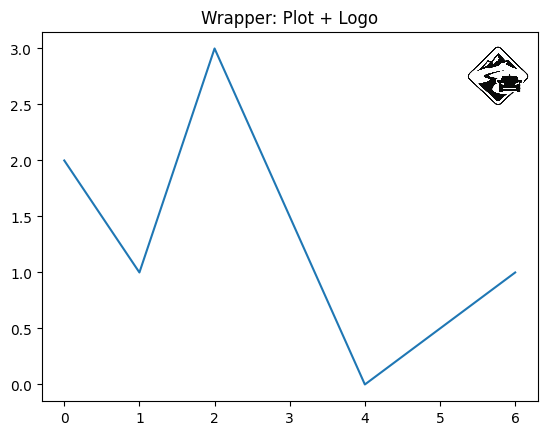

In [1]:
from io import BytesIO
from urllib.request import urlopen

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

LOGO_URL = "https://github.com/fk03ingenieursinformatik/ingenieurinformatik-buch-deploy/blob/master/img/logo-mini.png?raw=true"

def load_logo(url: str):
    """Lädt das Logo von einer URL (PNG) als Bildarray."""
    with urlopen(url, timeout=10) as response:
        data = response.read()
    return mpimg.imread(BytesIO(data), format="png")


def add_logo(ax, logo, *, zoom: float = 0.07, xy=(0.92, 0.88)):
    """Fügt ein Logo oben rechts in ein Axes-Objekt ein."""
    imagebox = OffsetImage(logo, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, xycoords="axes fraction", frameon=False)
    ax.add_artist(ab)
    return ab

def plot_line_with_logo(x, y, *, logo_url: str = LOGO_URL, **plot_kwargs):
    fig, ax = plt.subplots()
    ax.plot(x, y, **plot_kwargs)
    add_logo(ax, load_logo(logo_url))
    return fig, ax


fig, ax = plot_line_with_logo([0, 1, 2, 4, 6], [2, 1, 3, 0, 1], color="tab:blue")
ax.set_title("Wrapper: Plot + Logo")
plt.show()

**Was ist daran „ungut“?**

Ein Wrapper ist nicht „falsch“ – aber in der Praxis hat er typische Probleme:

**Skalierung:** Heute Linie, morgen `scatter`, dann `hist`, dann mehrere Subplots … der Wrapper wächst schnell oder es entstehen viele Wrapper.

- `plot_line_with_logo(...)` kapselt `ax.plot(...)`
- `plot_scatter_with_logo(...)` kapselt `ax.scatter(...)`
- `plot_hist_with_logo(...)` kapselt `ax.hist(...)`
- …

**Unschön:** Es entstehen dann sehr viele neue Funktionen, die gepflegt werden müssen.

**Disziplin:** Alle müssen den Wrapper konsequent verwenden. Sobald jemand `plt.subplots()` direkt nutzt, fehlt das Logo wieder.


Die Frage ist also: **Können wir das Logo hinzufügen, ohne für jede Plot-Variante eine neue Wrapper-Funktion zu schreiben?**

Genau an dieser Stelle hilft Objektorientierung: Wir erweitern eine passende Komponente von Matplotlib so, dass das Logo „von innen“ automatisch ergänzt wird – ohne dass sich die Nutzung von `plot`, `scatter`, `set_title`, … für Anwender:innen ändern muss.

Wie das konkret funktioniert, sehen Sie in der OOP-Variante im nächsten Abschnitt.